In [180]:
import pandas as pd
# import pandas_profiling as pp
# from pandas.tseries.holiday import 
import matplotlib.pyplot as plt
%matplotlib inline

In [177]:
test_df = pd.read_csv("./test.csv")
test_df.shape

(90675, 6)

In [191]:
test_df[test_df["impression_id"]=="85b73c10a8fba7060054d48d542279d6"]

,impression_id,impression_time,user_id,app_code,os_version,is_4G
14,85b73c10a8fba7060054d48d542279d6,2018-12-13 07:55:00,66927,318,latest,0


In [178]:
item_df = pd.read_csv("./item_data.csv")

In [185]:
item_df.item_price.median()

2944.0

In [186]:
item_df.category_1.value_counts()

9     17343
17    16306
1     15404
4     11892
11    10386
13     9616
7      9050
8      8147
14     7838
10     6697
12     5472
16     5139
0      4961
15     3200
6      1307
2         2
5         1
Name: category_1, dtype: int64

In [189]:
item_df.category_2.value_counts()[:5]

38    6307
39    5940
8     5897
42    5469
57    5041
Name: category_2, dtype: int64

In [188]:
item_df.category_3.value_counts()[:5]

62     6065
292    4174
114    2910
151    2719
84     2707
Name: category_3, dtype: int64

In [190]:
item_df.product_type.value_counts()[:5]

2874     4261
5622     1417
5036     1262
10412     990
7791      980
Name: product_type, dtype: int64

In [184]:
item_df[item_df["item_id"]==103132]

,item_id,item_price,category_1,category_2,category_3,product_type


In [62]:
log_df = pd.read_csv("./view_log.csv")

In [63]:
log_df.user_id.unique()

array([ 4557, 74788, 23628, ...,  5127, 77576,  4925])

In [60]:
import numpy as np
a.iloc[(np.searchsorted(a.server_time.values, "2018-11-01 08:55:00"))]

server_time    2018-11-06 22:38:00
device_type                android
session_id                  986463
user_id                      23628
item_id                     112395
Name: 1132232, dtype: object

In [152]:
train_df = pd.read_csv("./train.csv")

In [153]:
# train_df = train_df.iloc[:100]

In [154]:
train_df.user_id.unique().shape

(74723,)

In [155]:
# train_df.groupby(["impression_time", "user_id"]).count()

In [156]:
df1 = pd.merge(train_df,log_df, on="user_id")

In [157]:
df1.shape, df1.user_id.unique().shape

((11052882, 11), (74723,))

In [158]:
df1["impression_date"] = pd.to_datetime(df1["impression_time"]).dt.date
df1["server_date"] = pd.to_datetime(df1["server_time"]).dt.date

In [159]:
df1["diff"] = (df1["impression_date"]-df1["server_date"]).dt.days

In [160]:
df1.shape, df1.user_id.unique().shape

((11052882, 14), (74723,))

In [161]:
# df1[df1["user_id"]==63410]

In [162]:
df1 = df1[df1["diff"]>0]

In [137]:
df1.shape

(2055, 14)

In [163]:
# df2 = df1.groupby(["impression_time", "user_id"]).filter(lambda x: x.diff.min())
df1 = df1.loc[df1.groupby(["impression_time", "user_id"])["diff"].idxmin()]

In [168]:
train_df.shape

(237609, 7)

In [174]:
l = list(set(list(train_df.impression_id)) - set(list(df1.impression_id)))

In [176]:
count = 0
for i in l:
    if train_df[train_df["impression_id"]==i]["is_click"].values[0] == 1:
        count+=1
count

257

In [ ]:
# # item_id_list = []
# # for _, row in tqdm(merged_df.iterrows()):
# #     #date1 = row["impression_time"]
# #     item_id = log_df[(log_df["user_id"]==row["user_id"]) 
# #                      & (log_df["server_time"]<=row["impression_time"])].iloc[-1:]["item_id"][-1:]
# # #     #item_id = log_df[(log_df["user_id"]==row["user_id"]) & (log_df["server_time"]==date2)]["item_id"]
# # #     price_sum = pd.merge(item_id, item_df, on="item_id")["item_price"].mean()
# #     item_id_list.append(item_id)
    
# # # #     print(price_sum)
# # # #     print(date1)
# # # #     print(item_id)
# # # #     break
# # item_id_list
# def get_item_id(user_id, impression_time):
#     #print(user_id)
#     item_id = log_df[(log_df["user_id"]==user_id) 
#                      & (log_df["server_time"]<=impression_time)].iloc[-1:]["item_id"][-1:]
#     return item_id

In [172]:
train_df[train_df["impression_id"]=="6602aa0b985afb4059ebbebf05e46d76"]["is_click"].values[0]

0

In [166]:
log_df[log_df["user_id"]==42491]

,server_time,device_type,session_id,user_id,item_id
2171245,2018-11-25 08:49:00,android,791776,42491,33633
2184860,2018-11-25 14:12:00,android,574945,42491,28034
2205598,2018-11-25 20:53:00,android,712420,42491,105092
2205822,2018-11-25 20:56:00,android,712420,42491,105243
2249851,2018-11-26 19:30:00,android,102842,42491,114286
2329109,2018-11-28 20:23:00,android,267288,42491,83521
2329249,2018-11-28 20:25:00,android,267288,42491,105243
2367736,2018-11-29 20:45:00,android,247865,42491,73938
2758183,2018-12-06 02:01:00,android,635209,42491,105243
2758229,2018-12-06 02:04:00,android,635209,42491,105243


In [41]:
merge1.columns

Index(['server_time', 'device_type', 'session_id', 'user_id', 'item_id',
       'item_price', 'category_1', 'category_2', 'category_3', 'product_type'],
      dtype='object')

In [55]:
merge1.groupby("user_id").item_price.apply()

NameError: name 'reset_index' is not defined

In [39]:
train_df[train_df["user_id"]==87862]

,impression_id,impression_time,user_id,app_code,os_version,is_4G,is_click
0,c4ca4238a0b923820dcc509a6f75849b,2018-11-15 00:00:00,87862,422,old,0,0
616,621bf66ddb7c962aa0d22ac97d69b793,2018-11-15 00:19:00,87862,422,old,0,0
5936,ab394288aed46588bdc90bf4b541ec0d,2018-11-16 17:29:00,87862,422,old,0,0


In [18]:
a = train_df[train_df["user_id"]==0]["impression_time"].values[0]

In [35]:
gb = log_df.groupby("user_id")

user_id
0         42
1          8
2        165
3          8
4          2
5          1
6         13
7          6
8        182
9         22
10        92
11         2
12       105
14        51
15        45
16         9
17         1
18         6
19        41
20        90
21        38
22        21
23         1
24        15
25        49
26        18
27        38
28        34
29        25
30        38
        ... 
92556      1
92557      3
92558     10
92559     16
92560      4
92561     17
92562      3
92563      7
92564      1
92565      7
92566     31
92567     56
92568      2
92569     82
92570      2
92571      3
92572      5
92573      4
92574      2
92576     24
92577      2
92578      8
92579      5
92580     12
92581     11
92582     11
92583      3
92584      3
92585      5
92586     22
Name: server_time, Length: 89157, dtype: int64

In [15]:
log_df[log_df["user_id"]==0]

,server_time,device_type,session_id,user_id,item_id
163910,2018-10-18 14:27:00,android,268465,0,44459
163921,2018-10-18 14:27:00,android,268465,0,44459
164584,2018-10-18 14:43:00,android,268465,0,44459
164700,2018-10-18 14:46:00,android,268465,0,44459
164729,2018-10-18 14:46:00,android,268465,0,44459
164774,2018-10-18 14:47:00,android,268465,0,44459
338978,2018-10-22 09:48:00,android,295495,0,40228
538172,2018-10-26 09:07:00,android,675965,0,58320
538227,2018-10-26 09:08:00,android,675965,0,129641
1107788,2018-11-06 14:46:00,android,956652,0,40228


In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
log_df.user_id.unique()

array([ 4557, 74788, 23628, ...,  5127, 77576,  4925])

In [46]:
train_df.user_id.unique()

array([87862, 63410, 71748, ..., 89765, 43386,  2699])

In [56]:
# df1 = log_df[log_df[""]==89765]
df2 = train_df[train_df["is_click"]==1]

In [57]:
df2.user_id.unique()

array([63410, 74339, 81926, ..., 50864, 83666, 19918])

In [65]:
df1 = log_df[log_df["user_id"]==74339]

In [108]:
df1

,server_time,device_type,session_id,user_id,item_id
204076,2018-10-19 10:37:00,android,248910,74339,100847
204756,2018-10-19 10:54:00,android,248910,74339,117590
204851,2018-10-19 10:56:00,android,248910,74339,6131
371236,2018-10-22 21:39:00,android,542468,74339,78766
371282,2018-10-22 21:40:00,android,542468,74339,129770
371298,2018-10-22 21:40:00,android,542468,74339,13924
371318,2018-10-22 21:41:00,android,542468,74339,115366
371333,2018-10-22 21:41:00,android,542468,74339,129770
489998,2018-10-25 08:45:00,android,943333,74339,71838
571987,2018-10-27 00:31:00,android,1026359,74339,16770


In [71]:
df2 = df2[df2["user_id"]==74339]

In [118]:
for _, row in df2.iterrows():
    date1 = row["impression_time"]
    date2 = df1[df1["server_time"]<=date1]["server_time"][-1:].values[0]
    print(type(date2))
    item_id = log_df[(log_df["user_id"]==74339) & (log_df["server_time"]==date2)]["item_id"]
    df3 = pd.merge(item_id, item_df, on="item_id")["item_price"].sum()
    print(df3)
    

<class 'str'>
29094
<class 'str'>
14080
<class 'str'>
14176


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36],
 <a list of 37 Text xticklabel objects>)

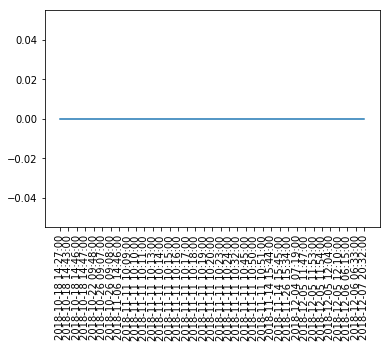

In [39]:
plt.plot(df1['server_time'], df1['user_id'])
plt.xticks(rotation='vertical')

In [30]:
gb = log_df.groupby("user_id").item_id.nunique().reset_index().rename(columns={"item_id":'count'})

In [31]:
gb.head()

,user_id,count
0,0,18
1,1,8
2,2,130
3,3,3
4,4,2


In [33]:
gb[gb['user_id']==0]["count"][0]

18

In [34]:
gb2 = log_df.groupby("user_id").session_id.nunique().reset_index()

In [35]:
gb2.head()

,user_id,session_id
0,0,11
1,1,3
2,2,37
3,3,1
4,4,1


In [27]:
gb3 = log_df.groupby("user_id").size().reset_index().rename(columns={0:'count'})
gb3.head()

,user_id,count
0,0,42
1,1,8
2,2,165
3,3,8
4,4,2


In [ ]:
item_df.columns

In [ ]:
train_df.user_id[:5]

In [ ]:
train_df[train_df["user_id"]==87862]

In [ ]:
log_df[log_df["user_id"]==71748]["session_id"].value_counts()

In [ ]:
log_df[log_df["user_id"]==71748]["item_id"].value_counts()

In [ ]:
train_df.app_code.value_counts()

In [ ]:
# train_df[train_df["user_id"]==63410]

In [ ]:
train_df_2 = pd.DataFrame(train_df[["user_id"]].user_id.unique(),columns=["user_id"])

In [ ]:
train_df_2.shape

In [ ]:
merge_1 = pd.merge(train_df_2,log_df,on="user_id")

In [ ]:
merge_1.shape

In [ ]:
merge_2 = pd.merge(merge_1,item_df, on="item_id")

In [ ]:
merge_2.shape

In [ ]:
a = merge_2.groupby("user_id").item_price.sum().reset_index()
a.shape, a.columns

In [ ]:
_t = pd.merge(train_df,a, on="user_id")
_t.shape

In [ ]:
_t.head(10)

In [ ]:
z[z["user_id"]==135].sum()

In [ ]:
z.groupby("user_id").item_price.sum().reset_index()

In [ ]:
%matplotlib inline

In [ ]:
l1 = merge_2.item_price.value_counts()

In [ ]:
l1

In [ ]:
merge_2.item_price.max()

In [ ]:
merge_2.hist(column=["item_price"],bins=)

In [ ]:
gb = log_df.groupby("user_id").size().reset_index().rename(columns={0:'count'})

In [ ]:
def get_session_count(x):
    #print(x)
    _x = list(gb[gb["user_id"]==x]["count"])[0]
    return _x

In [ ]:
train_df["session_count"] = train_df["user_id"].apply(lambda x: get_session_count(x))

In [ ]:
# train_df.groupby(["user_id", "app_code", "is_click"]).size().reset_index().rename(columns={0:'count'})

In [ ]:
train_df.head()

In [ ]:
train_df.shape

In [ ]:
train_df.is_click.value_counts()

In [ ]:
train_df.os_version.value_counts()

In [ ]:
train_df.is_4G.value_counts()

In [ ]:
del train_df["impression_id"]
train_df.columns

In [ ]:
train_df["impression_time"] = pd.to_datetime(train_df["impression_time"])

In [ ]:
train_df["impression_day"] = train_df["impression_time"].dt.day
train_df.shape

In [ ]:
train_df["impression_month"] = train_df["impression_time"].dt.month
train_df["impression_year"] = train_df["impression_time"].dt.year

In [ ]:
train_df["impression_week"] = train_df["impression_time"].dt.week
train_df["impression_day_week"] = train_df["impression_time"].dt.dayofweek

In [ ]:
train_df["impression_hour"] = train_df["impression_time"].dt.hour
train_df["impression_minute"] = train_df["impression_time"].dt.minute

In [ ]:
train_df.impression_time.value_counts()

In [ ]:
del train_df["impression_time"]

In [ ]:
del train_df["user_id"]

In [ ]:
y_train = train_df["is_click"]
del train_df["is_click"]

In [ ]:
y_train.value_counts()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
train_df["app_code"] = le.fit_transform(train_df["app_code"])

In [ ]:
train_df.shape

In [ ]:
train_df.impression_year.value_counts()

In [ ]:
del train_df["impression_year"]

In [ ]:
# train_df["impression_year"] = le.fit_transform(train_df["impression_year"])
# train_df.shape

In [ ]:
train_df["os_version"] = le.fit_transform(train_df["os_version"])
train_df.shape

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_df, y_train, stratify=y_train,
                                                        test_size=0.15,random_state=1234)

In [ ]:
y_train.value_counts(), y_test.value_counts()

In [ ]:
from xgboost import XGBClassifier
alg = XGBClassifier(learning_rate=0.1, n_estimators=140, max_depth=7,
                        min_child_weight=3, gamma=0.2, subsample=0.6, colsample_bytree=1.0,
                        objective='binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

In [ ]:
import xgboost as xgb
cv_folds=10
xgb_param = alg.get_xgb_params()
xgtrain = xgb.DMatrix(X_train.values, label=y_train.values)
# xgtest = xgb.DMatrix(X_test.values, label=y_test.values)
cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
                          early_stopping_rounds=50)
alg.set_params(n_estimators=cvresult.shape[0])
alg.fit(X_train, y_train,verbose=True, eval_metric='auc')

In [ ]:
from sklearn.metrics import roc_auc_score
val_pred = alg.predict_proba(X_test)[:, 1]
roc_auc_score(y_test,val_pred)

In [ ]:
test_df = pd.read_csv("./test.csv")

In [ ]:
test_df["session_count"] = test_df["user_id"].apply(lambda x: get_session_count(x))

In [ ]:
impr_id = test_df["impression_id"]
del test_df["impression_id"]

In [ ]:
test_df["impression_time"] = pd.to_datetime(test_df["impression_time"])
test_df["impression_day"] = test_df["impression_time"].dt.day
test_df["impression_month"] = test_df["impression_time"].dt.month
# test_df["impression_year"] = test_df["impression_time"].dt.year
test_df["impression_week"] = test_df["impression_time"].dt.week
test_df["impression_day_week"] = test_df["impression_time"].dt.dayofweek
test_df["impression_hour"] = test_df["impression_time"].dt.hour
test_df["impression_minute"] = test_df["impression_time"].dt.minute

In [ ]:
test_df["app_code"] = le.fit_transform(test_df["app_code"])
# test_df["impression_year"] = le.fit_transform(test_df["impression_year"])

In [ ]:
test_df["os_version"] = le.fit_transform(test_df["os_version"])

In [ ]:
test_df.columns

In [ ]:
user_id = test_df["user_id"]
del test_df["user_id"]

In [ ]:
del test_df["impression_time"]

In [ ]:
pred = alg.predict_proba(test_df)[:,1]
pred.shape

In [ ]:
pred.sum()

In [ ]:
pred[:10]

In [ ]:
impr_id[:10]

In [ ]:
sub_df = pd.DataFrame(list(zip(impr_id,pred)), columns=["impression_id", "is_click"])

In [ ]:
sub_df.head()

In [ ]:
sub_df.to_csv("sub_04.csv", index=False)